In [ ]:
#Libraries for Model Visualization
from comet_ml import Experiment

In [ ]:
experiment = Experiment(api_key="MHehhbanm9HbbvXptMjQ0hinn",
    project_name="tweet-sentiment-analysis",
    workspace="jessica-njuguna")

# Climate Change Analysis Belief 2022
© Explore Data Science Academy

_Prepared by:_
- Jessica Njuguna
- Stanley Agbo
- Uchenna Unigwe
- Hunadi Mawela
- Teddy Waweru

<a id="one"></a>
## 1. Introduction

Living things are dependent on particular conditions to survive. Humans are not exempt from this. Having the right temperature, sufficient water, clean air, and enough food are among the basic requirements for survival. The majority of these requirements depend on the stability of climate change. Climate change refers to shifts in the weather and temperature patterns. Human activity and natural occurrences contribute to climate change.

Since the 1800s, human cultures have been the main drivers of climate change. With increased deforestation, combustion of fossil fuels and increased livestock farming, the concentration of greenhouse gases has increased. These gases cause a greenhouse effect by trapping the sun's heat and escalating global warming.

Warmer temperatures change weather patterns disrupting the natural conditions of the earth. These disruptions harm our environment, degrading the quality of the Earth's air and water. In a bid to cool the earth and reduce the rate of climate change, global organizations are campaigning for more environmentally friendly products and practices. 

### Problem Statement

In the 21st Century, more companies build their brand with the consideration of **lessened environmental impact** or **carbon footprint**. Thus, their operations products and services are inclined to being more **environmentally friendly** and sustainable, in line with their values and ideals. <br>
To improve market research on their products/services, we developed the folowing **ML project** that intends to determine how people **perceive climate change**, and _whether or not they believe it is a real threat_. <br>

We believe this would provide a **metric** on how companies' products/service may be **received by the public**. Providing a robust ML solution will enable our clients to **access to a broad base of consumer sentiment**, spanning multiple demographic and geographic categories - thus **increasing their insights and informing future marketing strategies**.<br>

To build our **predictive model** for the project, we utilized a dataset of **collected tweet data** to determine if a person believes in climate data or _not_.


### Table of Contents

<a href=#one>1. Introduction </a>
- Problem Statement
- Table of Contents
- Summary
    - Agenda
    - Deliverables
    - Results
    - Future Considerations
- Preliminary Activities
    - Importing Packages
    - Loading the Datasets
    
<a href=#two>2. Exploratory Data Analysis </a>
- Functions Declaration
- Statistical Summaries
    - Train Dataset
    - Test Dataset
- Visualizations

<a href=#three>3. Data Engineering </a>
- Functions Declaration
- Dealing with Null Values
- Splitting features
- Dummy Variables
- Data Scaling
- Feature Selection

<a href=#four>4. Modelling </a>
- Functions Declaration
- Bernoulli Naive Bayes Classification
    - Introduction #
    - Model Development
    - Model Performance Metrics
    - Test Dataset Prediction Metrics
- Multinomial Naive Bayes Classification
    - Model Development
    - Model Performance Metrics
    - Test Dataset Prediction Metrics
- Logistic Regression Classification
    - Model Development
    - Model Performance Metrics
    - Test Dataset Prediction Metrics
- Support Vector Machine Classification
    - Model Development
    - Model Performance Metrics
    - Test Dataset Prediction Metrics
- Hyper Parameter Tuning

<a href=#five>5. Model Performance Comparison </a>


<a href=#six>6. Model Explanation </a>

<a href=#seven>7. Conclusion </a>

<a href=#eight>8. Appendix </a>
- Kaggle Submission
    - Functions Declaration
    - Submission Metrics

### Summary

**Agenda:**

**Deliverables:**

**Results:**

**Future Considerations:**

### Preliminary Activities

#### Importing Packages

In [1]:
# Libraries for data loading, data manipulation
import pandas as pd
import numpy as np

#Libraries for Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1)
from wordcloud import WordCloud
from statsmodels.graphics.correlation import plot_corr
from PIL import Image, ImageOps, ImageEnhance, PILLOW_VERSION
from wordcloud import STOPWORDS

#Libraries to clean the text
import contractions #This expands contraction such as 'don't' to 'do not'
import regex as re
import string
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import emoji #allows us to manipulate with emojis
import itertools


#Libraries for test pre-processing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer


# Libraries for data preparation
# import statsmodels.formula.api as sm
# from statsmodels.formula.api import ols
# from scipy.stats import pearsonr
# from statsmodels.distributions.empirical_distribution import ECDF       #Imported for displaying the Empirical Cumulative Distribution of Features
# from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

# Libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


#Libraries for Model Performance
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

# Libraries for mathematical analyses
import numpy as np


#Library for creating pickle files of the models
import pickle

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

<ipython-input-1-ec07253162a1>:11: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in Pillow 9 (2022-01-02). Use __version__ instead.
  from PIL import Image, ImageOps, ImageEnhance, PILLOW_VERSION


#### Loading the datasets

The project has two datasets:

1. The train data
    - This is the data that will be used to teach the Machine Learning Algorithm(model) to predict the sentiments.
2. The test data
    - The observations here will be predicted to gauge the prediction accuracy of the model(s) trained.

In [2]:
#A00
#load the datasets in raw_df
raw_train_df = pd.read_csv('resources/data/train.csv')
raw_test_df = pd.read_csv('resources/data/test.csv')

<a id="two"></a>
## 2. Exploratory Data Analysis

Exploratory Data Analysis(EDA) refers to investigating the data in its raw form to spot anomalies, discover patterns and check for assumptions using summary statistics. 

Preliminary checks of the EDA might include:

1. Columns in the data
2. Number of observations in the data
3. Presence of missing values in the data
4. Presence of duplicates
5. Type of data in the columns; numerical(discrete, continuous), categorical or time
6. Presence of outliers/uncommon observations

The patterns existing in the dataset can be displayed using graphs and visuals. To outline the patterns, we look at:
- Patterns in the individual columns (univariate analysis)
- Patterns between columns (multivariate analysis)

Analysis of the patterns allows us to test hypotheses that can give us insight into the topic the data covers. Going through the EDA process is necessary because it highlights the steps for preparing the data for prediction modelling.

### Statistical Summaries

Statistical Summaries are used to communicate information about large datasets by summarizing the set of observations. 

They can be measures of central tendancy (mean, mode), distribution (skewness and kurtosis) and relationship (correlation). The features of the dataset in this project is expected to be text data. The summaries that will be covered in the EDA are mode. Mode refers to the most frequent object, in this case words. The anomalies covered are the null values and the duplicates.

#### Train Dataset

We have loaded two datasets: train and test. This section explores the train dataframe. Thereafter, we will explore the test dataframe

First, we make a copy of the train dataset. Any manipulations on the data frame does not have an effect on the raw train_df. 

In [3]:
#A00
#Set deep as True to copy both the indices and data of the df
train_df = raw_train_df.copy(deep = True)

Next, we view the first five columns of the dataset. This gives us an overview of the columns and a preview of the rows

In [ ]:
train_df.head()

From the first five rows we see that the train df contains three columns containing the tweet in the message column, the sentiment in numerical figures and the tweetid.

Sometimes, data is inappriately stored and can cause issues when performing analysis. Therefore, we check the data type of the columns using .info 

In [ ]:
train_df.info()

The sentiment and tweetid column are stored as integers and the message is stored as string. These data types match the contents in the column. 

Given that the message is as string, we will have to convert it to numerical format in the feature engineering section. This will be done using vectorization. Vectorization takes the words in the columns and assigns them a numerical figure based on calculations on its frequency in the column.

Next, we inspect the number of observations in the dataframe. This allows us to see how many values we will be working with in the modelling phase.

In [ ]:
train_df.shape

The dataset contains 15,819 observations. Observations above 30 are considered as best practice for modelling.

In [ ]:
#Inspecting the tweetid column
train_df['tweetid'].describe()

- The tweetid column is in numerical figures ranging from 6 to 999888

Now that we have general information about the dataset, we look at our target variable. 

The sentiments are our target variable, using value_counts we see the different categories of sentiments and their corresponding number of observations and visualize with a bar graph

In [ ]:
#set the figure size
plt.figure(figsize=(8,6), dpi=80)

#plot the frequency of the sentiments:
#using df.plot function
mycolors = ["navy", "cornflowerblue", "blue", "aqua"]
train_df['sentiment'].value_counts(ascending = True).plot(kind = 'pie', 
                                                          title = 'Sentiment Distribution', 
                                                          xlabel = 'Sentiments',
                                                         ylabel = 'Frequency', colors = mycolors
                                                          )
plt.legend(['Anti', 'Nuetral', 'Factual', 'Pro'], loc ="lower right", bbox_to_anchor =(1.5, 0.15))
plt.show()
#display the actual values of the sentiments
train_df['sentiment'].value_counts()

As seen above, the sentiment column has four unique integers. From our variable description, we derive the following meanings for each category:
- 2 News: the tweet links to factual news about climate change
- 1 Pro: the tweet supports the belief of man-made climate change
- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
- -1 Anti: the tweet does not believe in man-made climate change

From the cell above, we see that Pro sentiments are the highest in the dataset with 8,530 observations. The Anti The sentiments are lowest with 1,296 obseravations. 

Therefore, our data has more information about Pro sentiments than it does about Anti sentiments. This is a representation gap that is reffered to as _imbalanced dataset_. Due to the insufficient information we have about the lower frequency sentiments,  the learning capability of our model is compromised.

In the feature engineering section, we will fix this by randomly selecting examples from the minority sentiments and adding them to the dataframe with replacement.


##### Duplicates

Incorrect duplicates affect the learning capability of the model. It is an anomally that gives conflicting information to the model. For this reason, we check for incorrect duplicates in the data to remove them in the Feature Engineering section. We are only concerned with the incorrect duplicates because we have a imbalanced dataset as highlighted above. The correct duplicates will remain in the dataset.

For this classification problem, each unique observation should have its own sentiment. That is, one tweet can not have two sentiments. Failure to which, the observation will be dropped.

We first check if there are duplicates in the tweet_id column using .unique()


The unique values of the tweetid column are equal to the number of observations in the dataset. Therefore, they are unique identifies to the tweets and there are no duplicate values.

We can now check if all the tweets are unique.

In [ ]:
#Checking the number of unique values

len(train_df['message'].unique())

There are 14,229 unique tweets which is less than the number of rows in the dataset. This is an indication of duplicated tweets in the dataset.

We get the exact number of duplicates in the message column by checking the shape of duplicated messages.

In [ ]:
#create a dataframe of duplicates
dupli = train_df[train_df.duplicated(['message'])]

#set the size of the plot
plt.figure(figsize=(8,6), dpi=80)
#generate the horizontal bar graph:
#using df.plot

dupli['sentiment'].value_counts(ascending = True).plot(kind = 'barh', 
                                                       title = 'Duplicates Distribution', 
                                                       xlabel = 'Sentiments',
                                                         ylabel = 'Frequency')
ax = plt.axes()
ax.set_facecolor('white')
plt.grid(False)
plt.savefig('duplicates.png')
plt.show()

#display the frequency of the duplicates per sentiment
print(dupli['sentiment'].value_counts())

The Pro sentiments have the highest number of duplicates and also the highest number of observations in the dataset. To assist with imbalancing, the duplicates for the Pro sentiments in the Feature Engineering section.

The duplicated tweets are 1,590. This is quite a number.
We are only interested in the tweets are similar but have been classified opposing each other. We check this by grouping the tweets and counting the unique sentiments of the grouped tweet. If a tweet has more than one unique sentiment, we conclude that it is an incorrect duplicate

In [ ]:
#filter the tweets: 
#that have more than one sentiment and create a df

duplicates = train_df.groupby('message').filter(lambda x: len(x['sentiment'].unique()) > 1)

#display the contents in the df
duplicates

Out of the duplicated observations, 8 of them are not equal in sentiment. These give us confilicting information about the relationship betweeen the tweet and the sentiment. 

Considering that the train dataset is imbalanced, we will drop the duplicates in the feature engineering section.

##### Missing data

Missing data refers to empty values in the data set. They are also referred to as null values and are represented as 'NaN'. Columns with alot of missing data can be dropped. The criteria of whether to drop a column with null values can be determined by a threshhold. If the column does not surpass a stipulated null value thresh hold, the null values can be replaced with the most frequent value in the column or the average of the column. 

We check for missing data by summing the number of null values for each column, as below.

In [ ]:
train_df.isna().sum()

There are no null values in the dataset. Therefore, no imputation will be perfomed on the data set. With these checks done, we can step into our main feature, the tweets.

##### Tweet Visualization

In this segment, we step into the tweets. We take a sample and view what it contains. One way to do this is through wordclouds.
Wordclouds are graphical representations of word frequency. It gives priority to more frequent words, and displays them with different font sizes. More frequent words appear larger than the less frequent words.

Generating the word cloud, gives us insight to what is prominent in each sentiment represented. We will also view the anomolies in the tweets that will be cleaned in the Feature Engineering section.

In [ ]:
#generating the wordcloud to show the top 50 words

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the wordcloud background color to white

# set max_words to 500

# set width and height to higher quality, 5000 x 4000

mask = np.array(Image.open(
                r'C:\Users\USER\Downloads\image.png'))
mask = mask +255                          
wordcloud = WordCloud(width = 4000, height = 5000, font_path = 'arial', 
                      background_color="white", mask = mask, 
                      max_words=500, min_font_size = 8, max_font_size=50, 
                      contour_color='#023075',
                      contour_width=3).generate(' '.join(train_df['message']))
# set the word color to black
wordcloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[20,10])
plt.title('Most frequent words in the tweets', fontsize = 24, color = 'blue')
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")

# remove plot axes
plt.axis("off")

plt.show()
wordcloud.to_file("wordcloud_general.png")

The wordcloud has generated the top 50 words in the message column. Climate change and global warming are the most frequent words judging by their size. This is in line with the project topic, especially that most tweets in the dataset are for pro-climate change sentiments. 

In addition we see some words that are not in English e.g.  SjoFoNá, and words that are not directly related to expressing a sentiment like 'RT'. This is referred to jargon. The process of eliminating the data in the tweets that is noise to the sentiment is called garbage in, garbage out. In the feature engineering section, we will perform this task before modelling the data.


Let us step into the tweets per sentiments and generate word clouds to check for patterns in the top 50 words

In [ ]:
#We generate a new data frame that joins all the tweets per sentiment

train_grouped=train_df[['sentiment','message']].groupby('sentiment').agg(sum)
train_grouped.head()

The resulting dataframe has one columns with the concatened tweets and four rows with the sentiments. To ascertain our success, let us sample on of the rows.

In [ ]:
#select the tweet of the sentiment in index 0
text = train_grouped.iloc[0,0]

text_list = [train_grouped.iloc[0,0], train_grouped.iloc[1,0],
             train_grouped.iloc[2,0], train_grouped.iloc[3,0]]


def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the wordcloud background color to white

# set max_words to 500

# set width and height to higher quality, 5000 x 4000

mask = np.array(Image.open(
                r'C:\Users\USER\Downloads\image.png'))
mask = mask +255                          
wordcloud = WordCloud(width = 4000, height = 5000, font_path = 'arial', 
                      background_color="white", mask = mask, contour_color='#023075',contour_width=3,
                      max_words=500, min_font_size=8, max_font_size=50)
title = ['Common words for News tweets',
        'Common words for Pro tweets',
        'Common words for Neutral tweets',
        'Common words for Anti tweets']

plt.figure(figsize=[20,15])
# Create subplots 
for i in range(0, len(text_list)):
    
    wordcloud.generate_from_text(text_list[i])
    wordcloud.recolor(color_func = black_color_func)
    plt.subplot(2, 2, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title[i])

    
plt.show()

The wordcloud shows that:
- Climate change and global warming are the most frequent words, similar to the general tweets wordcloud
- There is unnecessary jargon and common words e.g. cause and going
- Some key words in the wordcloud such as hoax and foax are grammarly aligned with anti-sentiments


The wordcloud for the neutral sentiments shows that:
- Climate change and global warming are the most frequent words, similar to the general tweets wordcloud
- There is unnecessary jargon and common words e.g. will and u


The wordcloud for the pro sentiments shows that:
- Climate change and global warming are the most frequent words, similar to the general tweets wordcloud
- There is unnecessary jargon and common words e.g. https and SjoFoNá
- Some key words in the wordcloud such as believe and real are grammarly aligned with pro-sentiments


The wordcloud for the factual sentiments shows that:
- Climate change and global warming are the most frequent words, similar to the general tweets wordcloud
- There is unnecessary jargon and common words e.g. rt and s
- Some key words in the wordcloud such as report and CNN are grammarly aligned with news. 


#### Tweet Summary Statistics

To explore the tweets in the dataset, we look at the features that summarizes information about the tweet.

The new features will be numerical in nature and non-redundant. These are:

1. Tweet Length
2. Number of words per tweet
3. Number of stop words per tweet
4. Number of punctuations per tweet
5. Number of hashtags
6. Number of mentions
7. Number of words beginning with an uppercase letter per tweet

After creating the features, we will visualize the tweets and draw insights.

_1. Tweet Length_ 

This is also referred to as the number of characters in the string. Twitter allows a maximum of 140 characters per tweet.

In [ ]:
train_df['tweet_len'] = train_df['message'].astype(str).apply(len)
train_df.groupby('sentiment')['tweet_len'].mean().plot(kind = 'box', subplots = True,
                                                       title = 'Tweet Length Distribution', 
                                                       xlabel = 'Sentiments',
                                                         ylabel = 'Frequency')
plt.grid(False)
plt.show()

train_df.groupby('sentiment')['tweet_len'].mean().plot(kind = 'barh', subplots = True,
                                                       title = 'Average Tweet Length per Sentiment', 
                                                       xlabel = 'Sentiments',
                                                         ylabel = 'Frequency')
plt.grid(False)
plt.show()

- The tweet length ranges between approximately 112.5 - 18.0.
- The average tweet length is 122.5. This is highly influenced by the pro sentiments which has the highest frequency in the dataset
- The pro sentiments have the highest average tweet length with over 120.

_2. Number of words per tweet_

In [ ]:
train_df['word_count'] = train_df["message"].apply(lambda x: len(re.findall(r'\w+', x)))
train_df.groupby('sentiment')['word_count'].mean().plot(kind = 'box', 
                                                       title = 'Number of Words Boxplot', 
                                                       xlabel = 'Sentiments',
                                                         ylabel = 'Frequency',
                                                       color = 'navy')
plt.grid(False)
plt.show()
train_df.groupby('sentiment')['word_count'].mean().plot(kind = 'barh', 
                                                       title = 'Average Number of Words per Sentiment', 
                                                       xlabel = 'Sentiments',
                                                         ylabel = 'Frequency',
                                                       color = 'navy')
plt.grid(False)
plt.show()

- The number of words range from 18 - 21, with a mean of 19.
- The neutral sentiment tweets have the lowest average number of words per tweet.
- Pro sentiments and Anti sentiments are nearly at par in the average number of words per tweet. This might be related to the high emotional connect that is linked to these beliefs.

_3. Number of stop words per tweet_

The term _stopwords_ in Data Science refers to the common words used to fill or link a sentence. These are words such as _don't_, _it_, and _this_. They occur frequently in the natural language. The identification and removal of stop words from texts increases the training quality of the model as it only highlights the keywords.

Using a natural languange processor, we have a list of these words in english that we can use in processing our data.

In [ ]:
stop_words = set(stopwords.words('english'))
train_df['num_stop_words'] = train_df['message'].str.split().apply(lambda x: len(set(x) & stop_words))
train_df.groupby('sentiment')['num_stop_words'].mean().plot(kind = 'box', 
                                                       title = 'Stop Words Boxplot', 
                                                       xlabel = 'Sentiments',
                                                         ylabel = 'Frequency',
                                                           color = 'navy')
plt.grid(False)
plt.show()
train_df.groupby('sentiment')['num_stop_words'].mean().plot(kind = 'barh', 
                                                       title = 'Average Number of Stop Words per Sentiment', 
                                                       xlabel = 'Sentiments',
                                                         ylabel = 'Frequency',
                                                           color = 'cornflowerblue')
plt.grid(False)
plt.show()

- Despite being the second most observed sentiment, the factual sentiments have the lowest number of stopwords.
- The Pro sentiments have the highest average number of stopwords, followed by the Anti sentiments

_4. Number of punctuations per tweet_

Similar to stopwords, punctuations occur frequently in text data. While they are useful in written text, models may mistakenly identify the punctuations as key to the sentiment. Therefore, it is key to identify their distribution for removal.

In [ ]:
train_df['num_punctuations'] = train_df["message"].apply(lambda x: len(re.findall(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*', 
                        x)))

train_df.groupby('sentiment')['num_punctuations'].mean().plot(kind = 'box', 
                                                       title = 'Punctuations Boxplot', 
                                                       xlabel = 'Sentiments',
                                                         ylabel = 'Frequency', color = 'navy')
plt.grid(False)
plt.show()
train_df.groupby('sentiment')['num_punctuations'].mean().plot(kind = 'barh', 
                                                       title = 'Average Number of Punctuations per Sentiment', 
                                                       xlabel = 'Sentiments',
                                                         ylabel = 'Frequency', color = 'navy')
plt.show()

- The maximum number of punctuations in a tweet, over 127, exceed the maximum number of words in the dataset.
- The neutral sentiment has the lowest number of punctuations as opposed to the Pro sentiments that have the highest.

_5. Number of hashtags_

Hashtags on twitter often acts as a guide to the topic of the tweet.

An example: 

    "Speaking as an @IPCC_CH Lead Author, these are some of the most important new messages from the #climate report out today: (🧵)
    1. For the first time we’re seeing evidence of real, sustained decreases in greenhouse gas emissions from some countries."

The tweet above is about climate change. However, you only have to spot the hashtag _#climate_ to identify the topic of the tweet. Similarly, we can identify the hashtags in the dataset to relate to the topic.

In [ ]:
train_df['num_hashtags'] = train_df["message"].apply(lambda x: len(re.findall(r'#(\w+)', x)))

plt.subplot(1,3,3)
sns.stripplot(y='num_hashtags', x='sentiment', data=train_df, jitter=True)
plt.title('Number of hashtags')
plt.ylabel('Hashtag frequency')
plt.xlabel('Sentiments')
fig = plt.gcf()
fig.set_size_inches( 23, 5)

plt.show()

- The number of hashtags in the tweets range from 0 - 8
- The Pro sentiments have the highest count of hashtags, 8. While the rest of the sentiments have their maximum hashtag count at 8.

_6. Number of mentions_

Mentions are a way to refer to another twitter user. For climate change tweets, they may refer to users that lead climate change conversations. 

We look at how many mentions are in the tweets, per sentiment in the cell below.

In [ ]:
train_df['num_mentions'] = train_df["message"].apply(lambda x: len(re.findall(r'@(\w+)', x)))

plt.subplot(1,3,3)
sns.stripplot(y='num_mentions', x='sentiment', data=train_df, jitter=True)
plt.title('Number of mentions')
plt.ylabel('Mentions frequency')
plt.xlabel('Sentiments')
fig = plt.gcf()
fig.set_size_inches( 23, 5)

plt.show()

- Majority of the tweets in the data mention another user at a range of 0 - 3.
- The neutral and pro sentiments have two tweets with the highest count of mentions amongst their tweets. 

_7. Number of words in UpperCase_

Another way to identify the topics of a tweet is through the words in upper case. Except in the event of a typo, beginning of a sentence and the pronoun 'I', words that begin with an uppercase refer to an entity or a person. An entity can be a company or a place.

Let us look at the distribution of the number of entities in the tweets.

In [ ]:
train_df['num_uppercase'] = train_df["message"].apply(lambda x:sum(map(str.isupper,x.split())))

plt.subplot(1,3,3)
sns.stripplot(y='num_uppercase', x='sentiment', data=train_df, jitter=True)
plt.title('Number of Uppercase')
plt.ylabel('Mentions frequency')
plt.xlabel('Sentiments')
fig = plt.gcf()
fig.set_size_inches( 23, 5)

plt.show()

The Factual sentiments, the Pro sentiments has the tweets with the highest number of UpperCase words.

##### In summary:

- Our dataset contains 15,189 observations and three columns; tweet id, message and sentiment
- There are no missing values in the dataset
- There are duplicates that will be dropped in the Feature Engineering section
- The tweets contains jargon and words that are not necessary for gaining insights. Therefore, it will be cleaned.
- Marjority of the numerical features in the dataset score highest for the Pro sentiments. The Pro sentiments also contain the highest number of observations. The data set contains alot of unique information about the Pro sentiments.

Using the new numerical features generated, we will attempt to enhance our understanding of the relationship between the tweets and the sentiment in the Feature Engineering section.

Having extensively explored the train data set, let us proceed to do the same with the test data set.

#### Test Dataset

It is best practice to separate the data into train and test dataframe. The train dataframe will be used to teach our model while the test dataframe checks if the model predicts accurately. For this project the predictions made on the test dataframe will be submitted on the kaggle challenge.

Similar to the train dataset, we first create a copy of the dataset in accordance with best practices

In [28]:
#A00
test_df = raw_test_df.copy(deep = True)

We then proceed to view the first five rows in the dataset

In [ ]:
test_df.head()

The test dataframe has two columns with the message and tweetid. The target variable, sentiment is not present in the dataset.

The message column contains text while the tweet id contains numerical figures.

In [ ]:
test_df.shape

The dataframe has 10,546 observations which we will use to predict for the model.

In [ ]:
test_df.isna().sum()

There are no null values in the dataframe. Therefore, there is no need to drop any rows.

##### Checking for duplicates

In [ ]:
len(raw_test_df['tweetid'].unique())

The tweet id  has no duplicates and uniquely identifies each tweet in the dataframe. Next we check if each tweet is unique.

In [ ]:
len(test_df['message'].unique())

The message column has duplicates since the number of unique tweets is less than the total number of observations in the dataframe.

The code below allows us to get the exact number of duplicates using '.duplicated'.

In [ ]:
test_df[test_df.duplicated(['message'])].shape

In the test dataframe, we have 971 duplicate tweets. During the model prediction, we will test out if the model predicts the same sentiment for the duplicated tweets. This will help us view the accuracy of the model

##### Tweet Visualisation

In [ ]:
mask = np.array(Image.open(
                r'C:\Users\USER\Downloads\image.png'))
mask = mask +255                          
wordcloud = WordCloud(width = 4000, height = 5000, font_path = 'arial', 
                      background_color="white", mask = mask, 
                      max_words=500, 
                      min_font_size=8, max_font_size=40, 
                      contour_color='#023075',
                      contour_width=3).generate(' '.join(test_df['message']))
# set the word color to black
wordcloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[20,10])
plt.title('Most Frequent Words in the Test Datafrane', fontsize = 24, color = 'black')
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")

# remove plot axes
plt.axis("off")

plt.show()

From the wordcloud, we derive the following insights:

- Climate change, global warming are some of the most frequent words in line with our topic. 
- Presence of https shows that there are many urls
- There is jargon in the tweet, e.g. SjoFoNá
- There is a mix of pro and anti words in the columns, e.g. believe and hoax.

The noise in the data, we will cleaned through the same steps that will be done for the train dataframe. In addition, the features engineered will be applied to the test dataframe before feeding it into the model for predictions.

Now we can move on to the next section, Feature Engineering.

<a id="three"></a>
## 3. Feature Engineering


Feature Engineering refers to the process of preparing raw data for modelling. This step improves the quality of results of the model, as compared to training the model with raw data. It involves:

1. Data Cleaning:
    - This is where the cleaning up null values, duplicates and outliers is done. 


2. Text Cleaning    
    - With text data, it consists of cleaning the noise in the text data.


3. Splitting the Data
    - For reduce the computational power required to vectorize and balance the dataset, the features and labels will be separated. In addition, we will split the data to train and test sets, to train and tune our models


4. Vectorize data:
    - The additional features are derived from the existing features.


5. Data Balancing
    - This process involves reducing the volume of our data only keeping the features that are most relevant to the dataset.


For our project we will perform all the steps highlighed above on the train_df. At the end of the section, we will have a training and testing dataset from the train_df, that we will use to build a model that predicts the sentiments

### Data Cleaning

As mentioned above data cleaning is the process of correcting the anomalies in the data. For this project, the anomalies detected in the train dataset were duplicates in the message column.

#### Dropping Duplicates

In the EDA section, we noted that there were 1,590 duplicates. Retaining duplicates presents the risk of overfitting the Machine Learning model and giving conflicting data to the model.

Overfitting refers to perfectly aligning the model to the training data. An overfitted model performs poorly on real world data, which is unseen.

First, we recap on the number of duplicates per sentiment.

In [ ]:
dupli['sentiment'].value_counts()

The Pro sentiments have the highest number of duplicates and the highest number of observations. Dropping all the duplicates, will reduce the imbalance in our dataset

In [5]:
#A00
train_df = train_df.drop_duplicates('message', keep = 'first')
clean_duplicated_values = train_df[train_df.duplicated(['message'])]
clean_duplicated_values['sentiment'].value_counts()

Series([], Name: sentiment, dtype: int64)

The resulting pandas series is empty, therefore the agenda has been achieved.


Since our data contains no missing data, we can proceed to clean the text data

### Text Cleaning

Unstructured data is not organized in any pre-defined model. Eighty to ninety percent of the world's dat falls into this category. In it's raw form, it contains a mix of information that is both useful or irrelevant depending on its topic. The irrelevant information is referred to as noise. The process of removing noise form data is called garbage in and garbage out. 

For this sentiment classification model, we are interested in the text data that relates to climate change. The noise is in form of punctuations, emojis, stopwords, etc. 

To improve the quality of the data, we will clean the text by performing the following steps:

1. Expand contractions
    - Expands shortened words like don't to do not.
    

2. Replace urls
    - After removing the punctuation and digits from a link, it becomes one text that decreases the ability to identify topics in the text. Hence we will replace the url's with 'url-web'.


3. Remove digits and words containing digits
    - For the topic at hand, we are seeking text data.


4. Lower the message
    - The model reads upper case, lower case and title case words are unique words even if they are the same word. We lower the message to reduce the features in the vectorizer.
    

5. Remove punctuation
    - As mentioned in the Exploratory Data Analysis, punctuation is occurs frequently in text data and contributes to the noise. Therefore, we will remove the punctuations from the dataset.
    

6. Remove emojis
    - Emojis are graphical features that are used to express emotions. While they are not frequently observed in most data, they do not provide crutial information to the data.
    

7. Lemmetazition
    - This is the process of reducing a word to its root. It reduces plurals to singular form, adjectives to noun, etc. FOr example: jugs -> jug, chasing -> chase, sadness -> sad. etc.
    
    


The stopwords are removed by the vectorizer. We will create functions to do the preprocessing below, test the function then apply it to our train dataframe.

#### Functions Declaration

In [9]:
#A00
'''The following functions will be used to
    preprocess the train data'''

   
def preprocess(tweet):
    
    #remove urls
    tweet = re.sub(
        r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+',
        'url-web', tweet)
    #remove digits and words with digits
    tweet = re.sub('\w*\d\w*','', tweet)
    
    #make text lowercase
    tweet = tweet.lower() # lower case
    
    #expand contractions
    tweet = contractions.fix(tweet)
    
    #remove punctuation
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet) # strip punctuation
    
    #remove emojis
    tweet = emoji.replace_emoji(tweet, replace = '')
    
    #lemmatize the text
    token_words = TreebankWordTokenizer().tokenize(tweet)
    lemmatizer = WordNetLemmatizer()
    lem_sentence=[]
    for word in token_words:
        #just lemmmatize
        lem_word = lemmatizer.lemmatize(word)
        lem_sentence.append(lem_word)
        lem_sentence.append(" ")
    tweet = "".join(lem_sentence)
    
    return tweet



_Testing out the pre-processor_

In [ ]:
tweet = "Never shan't I'm   think ?> https://scikit-learn.org/ 5689 @nuts wht's g9? 😃😃😄"
#tweet = re.sub('s+', ' ', tweet)
preprocess(tweet)

The pre-processor has successfully performed the following steps:
- Remove digits and words with digits (g9)
- Remove emojis (😃😃😄)
- Remove punctuation (?>)
- Replaced links (https://scikit-learn.org/)
- Lowered text (Never -> never)
- Expanded contractions (I'm -> i am)
- Lemmatized the text (nuts - nut)

We can now apply it to the message column to clean the tweets.

In [10]:
#A00
train_df['message'] = train_df['message'].apply(lambda x: preprocess(x))

This is has been completed. We move on to splitting the data in preparation for vectorization.

### Splitting the Data


The data will first split into features and labels. The features will be used to model the label variable.


In [11]:
#A00
X = train_df.drop(columns = ['tweetid', 'sentiment'], axis = 1)
y = train_df['sentiment']
X.reset_index(drop = True, inplace = True)
X.head()

,message
0,polyscimajor epa chief doe not think carbon di...
1,it is not like we lack evidence of anthropogen...
2,rt rawstory researcher say we have three year ...
3,todayinmaker wired wa a pivotal year in the wa...
4,rt soynoviodetodas it is and a racist sexist c...


The dataset has been separated successfully. The feature dataframe X, does not contain the label variable, 'sentiment'. We now split the X and y variables further.

#### Splitting the Train and Test Datasets

The feature and label dataframes are split into train and test data pairs before modelling. The train pair is used by the model to learn to predict the target variable. The test pair, unseen data, is used to evaluate how well the model can predict the target variable.

In [12]:
#A00
X_train, X_test, y_train, y_test = train_test_split(X, y,
                        test_size=0.3)

### Text Vectorization


Text Vectorization is the process of turning text data to numerical data. The numerical figures are populated using the frequency of the text in the dataframe.

For this classification problem, we will use the TFIDF vectorizer.

#### TFIDF Vectorizer

In full TFIDF stands for Term Frequency Inverse Document Frequency. It measures how relevant a word is to the dataframe using two metrics:

1. Term Frequency
- Number of times a word appears in a row
2. Inverse Document Frequency
- How common a word is in the entire column. The closer this metric is to zero, the more common a word is.

#####                                              TFIDF = Term Frequency x Inverse Document Frequency

The higher the TFIDF score, the higher the relevance of the word to the dataset.

We will create two vectorizers, one with the additional features created in the Exploratory Data Analysis section and one without the additional features.

In [13]:
#A00
#Function to vectorize the message column
tfidf_vectorizer = TfidfVectorizer(min_df=2, strip_accents = 'ascii', smooth_idf=False)

##### TFIDF Vectorizer without Additional Features

In [14]:
#A00
text = X.message

#fit the vectorizer with the message
tfidf_vectorizer.fit(X_train['message'])

#transform the X_train data
tfidf_train = tfidf_vectorizer.transform(X_train['message'])

#transform X_test data
tfidf_test = tfidf_vectorizer.transform(X_test['message'])

tfidf_train and tfidf_test contain the tfidf values only. We will use this to test out the data

##### TFIDF Vectorizer with Additional Features

#convert the tfidf dfs to array
tfidf_array = tfidf_train.toarray()
test_tfidf_array = tfidf_test.toarray()

#define new columns from get feature names
new_cols = tfidf_vectorizer.get_feature_names_out()

#drop the message column from X_train and X_test
#resulting dfs only contains the additional features
X_tftrain = X_train.drop(columns = ['message'], axis = 1)
X_tftest = X_test.drop(columns = ['message'], axis = 1)

#Join the tfidf array to the additional features
tfidf_test_xfeat = X_tftest.join(pd.DataFrame(test_tfidf_array, columns = new_cols))

tfidf_train_xfeat = X_tftrain.join(pd.DataFrame(tfidf_array, columns = new_cols))


print('TF-IDF Vector Shape: \t {}'.format(len(tfidf_vectorizer.get_feature_names_out())))

tfidf_train_xfeat.isna().sum()

Now we have two types of training and testing datasets:

- Dataframes with TFIDF and additional features: _tfidf_test_xfeat, tfidf_train_xfeat_
    
- Sparse matrixes with TFIDF values only: _tfidf_train, tfidf_test_

#### Visualizing Cleaned Text

Let's group the data by sentiment

In [ ]:
visual_df = train_df.drop(['tweetid', 'message', 'tweetid',
                            'tweet_len', 'sent_count', 'word_count',
                            'num_unique', 'num_stop_words',
                            'num_punctuations', 'num_hashtags',
                            'num_mentions', 'num_uppercase'], axis = 1)

visual_df = visual_df.join(pd.DataFrame(tfidf_array, columns = new_cols))

In [ ]:
visual_grouped = visual_df.groupby('sentiment').agg(sum)
visual_grouped.head()

In [ ]:
data = visual_grouped.transpose()
data.head()

In [ ]:
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the wordcloud background color to white
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000
stopwords = list(STOPWORDS)
stopwords.append('climate')
                              
wordcloud = WordCloud(font_path = 'arial', 
                      background_color="white", width=3000, 
                      height=2000, 
                      max_words=500, stopwords=stopwords).generate_from_frequencies(data[-1])
# set the word color to black
wordcloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[20,6])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
##include rt, https, climate change, global warming

In [ ]:
wordcloud = WordCloud(font_path = 'arial', 
                      background_color="white", width=3000, 
                      height=2000, 
                      max_words=500).generate_from_frequencies(data[0])
# set the word color to black
wordcloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[20,6])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")

In [ ]:
wordcloud = WordCloud(font_path = 'arial', 
                      background_color="white", width=3000, 
                      height=2000, 
                      max_words=500).generate_from_frequencies(data[1])
# set the word color to black
wordcloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[20,6])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")

In [ ]:
wordcloud = WordCloud(font_path = 'arial', 
                      background_color="white", width=3000, 
                      height=2000, 
                      max_words=500).generate_from_frequencies(data[2])
# set the word color to black
wordcloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[20,6])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")

train_grouped

### Balancing the Datasets

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_bal, y_train_bal = sm.fit_resample(tfidf_train, y_train)

In [ ]:
Undersampling

In [ ]:
Different sampling

Oversampling generates a Memory Error. Let us try undersampling instead

### Optimizing our features - 

NB: code is not working in the process of fixing it

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', BernoulliNB())])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidf__min_df': (1, 2, 3),
    'tfidf__strip_accents': ('ascii', 'unicode', None)
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print (grid_search_tune.best_estimator_.steps)

<a id="four"></a>
## 4. Modelling

#### Function Declaration

In [15]:
#A00
def fit_eval_model(model,X_train, X_test):
    # fit the model
    model.fit(X_train, y_train)
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}' for v1 in group_percentages]
    labels = np.asarray(labels).reshape(4,4)
    # labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    # labels = np.asarray(labels).reshape(2,2)
    print(labels)
    print(group_percentages)
    print(cf_matrix)
    sns.heatmap(cf_matrix,
                annot = labels,
                cmap = 'Blues',fmt = '',
                xticklabels = categories,
                yticklabels = categories)
    # plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    # plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    # plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Bernoulli Naive Bayes

#### Model Development

              precision    recall  f1-score   support

          -1       0.85      0.21      0.33       374
           0       0.48      0.43      0.45       670
           1       0.71      0.79      0.75      2143
           2       0.72      0.80      0.76      1082

    accuracy                           0.69      4269
   macro avg       0.69      0.56      0.57      4269
weighted avg       0.69      0.69      0.67      4269

[['1.83%' '2.11%' '4.19%' '0.63%']
 ['0.14%' '6.68%' '7.40%' '1.48%']
 ['0.19%' '4.38%' '39.87%' '5.76%']
 ['0.00%' '0.66%' '4.33%' '20.36%']]
['1.83%', '2.11%', '4.19%', '0.63%', '0.14%', '6.68%', '7.40%', '1.48%', '0.19%', '4.38%', '39.87%', '5.76%', '0.00%', '0.66%', '4.33%', '20.36%']
[[  78   90  179   27]
 [   6  285  316   63]
 [   8  187 1702  246]
 [   0   28  185  869]]


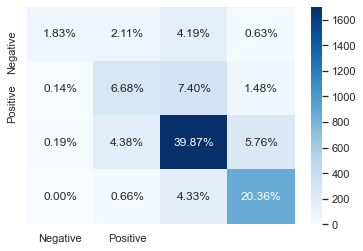

In [16]:
#A00
BNBModel = BernoulliNB()
fit_eval_model(BNBModel, tfidf_train, tfidf_test)

#### Model Performance Metrics

In [ ]:
BNB_comet = BernoulliNB()
BNB_comet.fit(X_train,y_train)
y_pred = BNB_comet.predict(X_test)

#### Test Dataset Prediction Metrics

In [ ]:
BNBModel = BernoulliNB()
fit_eval_model(BNBModel, X_train, X_test)

### Multinomial Naive Bayes

              precision    recall  f1-score   support

          -1       0.93      0.03      0.07       374
           0       0.78      0.05      0.10       670
           1       0.59      0.97      0.74      2143
           2       0.86      0.56      0.68      1082

    accuracy                           0.64      4269
   macro avg       0.79      0.40      0.39      4269
weighted avg       0.72      0.64      0.56      4269

[['0.30%' '0.12%' '7.96%' '0.37%']
 ['0.02%' '0.82%' '14.36%' '0.49%']
 ['0.00%' '0.09%' '48.75%' '1.36%']
 ['0.00%' '0.02%' '11.20%' '14.13%']]
['0.30%', '0.12%', '7.96%', '0.37%', '0.02%', '0.82%', '14.36%', '0.49%', '0.00%', '0.09%', '48.75%', '1.36%', '0.00%', '0.02%', '11.20%', '14.13%']
[[  13    5  340   16]
 [   1   35  613   21]
 [   0    4 2081   58]
 [   0    1  478  603]]


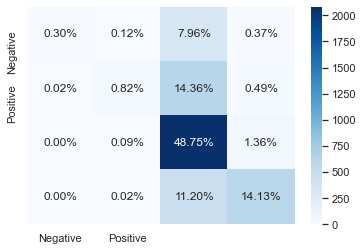

In [17]:
#A00

mb = MultinomialNB()
fit_eval_model(mb, tfidf_train, tfidf_test)

### Logistic Regression

              precision    recall  f1-score   support

          -1       0.73      0.35      0.47       374
           0       0.62      0.39      0.48       670
           1       0.72      0.87      0.79      2143
           2       0.78      0.77      0.77      1082

    accuracy                           0.72      4269
   macro avg       0.71      0.59      0.63      4269
weighted avg       0.72      0.72      0.71      4269

[['3.05%' '1.08%' '4.15%' '0.49%']
 ['0.61%' '6.09%' '7.66%' '1.34%']
 ['0.47%' '2.25%' '43.76%' '3.72%']
 ['0.07%' '0.35%' '5.41%' '19.51%']]
['3.05%', '1.08%', '4.15%', '0.49%', '0.61%', '6.09%', '7.66%', '1.34%', '0.47%', '2.25%', '43.76%', '3.72%', '0.07%', '0.35%', '5.41%', '19.51%']
[[ 130   46  177   21]
 [  26  260  327   57]
 [  20   96 1868  159]
 [   3   15  231  833]]


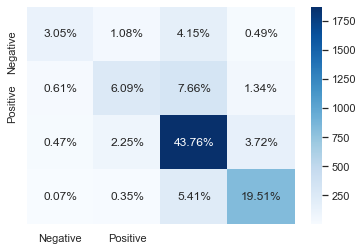

In [18]:
#A00
lr = LogisticRegression(C=2, max_iter=1000, n_jobs=-1)
fit_eval_model(lr, tfidf_train, tfidf_test)

### SVC

              precision    recall  f1-score   support

          -1       0.90      0.23      0.37       374
           0       0.75      0.24      0.36       670
           1       0.67      0.91      0.77      2143
           2       0.79      0.75      0.77      1082

    accuracy                           0.70      4269
   macro avg       0.78      0.53      0.57      4269
weighted avg       0.73      0.70      0.67      4269

[['2.01%' '0.33%' '6.04%' '0.37%']
 ['0.14%' '3.75%' '10.63%' '1.17%']
 ['0.09%' '0.80%' '45.72%' '3.58%']
 ['0.00%' '0.12%' '6.23%' '19.00%']]
['2.01%', '0.33%', '6.04%', '0.37%', '0.14%', '3.75%', '10.63%', '1.17%', '0.09%', '0.80%', '45.72%', '3.58%', '0.00%', '0.12%', '6.23%', '19.00%']
[[  86   14  258   16]
 [   6  160  454   50]
 [   4   34 1952  153]
 [   0    5  266  811]]


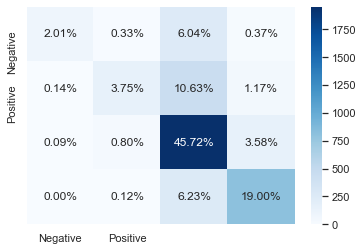

In [19]:
#A00
svc = SVC(kernel='rbf')
fit_eval_model(svc, tfidf_train, tfidf_test)

### Random Forest

              precision    recall  f1-score   support

          -1       0.84      0.14      0.24       374
           0       0.62      0.27      0.38       670
           1       0.65      0.89      0.75      2143
           2       0.77      0.70      0.73      1082

    accuracy                           0.68      4269
   macro avg       0.72      0.50      0.53      4269
weighted avg       0.69      0.68      0.64      4269

[['1.24%' '0.80%' '6.30%' '0.42%']
 ['0.14%' '4.29%' '10.35%' '0.91%']
 ['0.02%' '1.57%' '44.79%' '3.82%']
 ['0.07%' '0.26%' '7.33%' '17.69%']]
['1.24%', '0.80%', '6.30%', '0.42%', '0.14%', '4.29%', '10.35%', '0.91%', '0.02%', '1.57%', '44.79%', '3.82%', '0.07%', '0.26%', '7.33%', '17.69%']
[[  53   34  269   18]
 [   6  183  442   39]
 [   1   67 1912  163]
 [   3   11  313  755]]


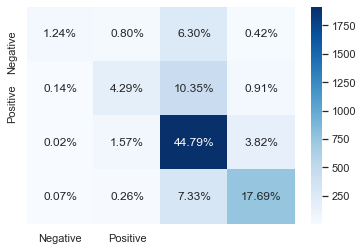

In [20]:
#A00
forest = RandomForestClassifier(n_estimators=50, max_features='sqrt', max_depth=200, bootstrap=False, random_state=42)
fit_eval_model(forest, tfidf_train, tfidf_test)

### Model Performance Comparison

### Hyperparameter Tuning (GridSearchCV)

In [21]:
#A00
import warnings
warnings.filterwarnings('ignore')

parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    
                   param_grid = parameters,   
                   scoring='accuracy',        
                   cv=10)

clf.fit(tfidf_train ,y_train)

print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

#### Model Development on Comet

In [ ]:
BNB_comet = BernoulliNB()
BNB_comet.fit(X_train,y_train)
y_pred = BNB_comet.predict(X_test)

In [ ]:
f1 = f1_score(y_test, y_pred, average = 'weighted')
precision = precision_score(y_test, y_pred, average = 'weighted', zero_division = 1)
recall = recall_score(y_test, y_pred, average = 'weighted')
confusion = confusion_matrix(y_test, y_pred)
confusion

In [ ]:
params = {"test_size": 0.3,
          "model_type": "Bernoulli-Naive_Bayes",
          "vectorizer": "tfidf vectorizer",
          "param_grid": "None" ,
          "stratify": True
          }
metrics = {"f1 score": f1,
           "recall matrix": recall,
           "precision matrix": precision,
           'confusion matrix': confusion
           }
experiment_name = 'Bernoulli Naive Bayes Feature Engineering'

In [ ]:
experiment.set_name(experiment_name)
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [ ]:
experiment.end()

<a id="five"></a>
## 5. Model Explanation

<a id="six"></a>
## 6. Conclusion

<a id="seven"></a>
## 7. Appendix

### Kaggle Submission

#### Functions Declaration

In [25]:
#feed in preprocessing
#A00
def clean_vector(df):
    
    def test_preprocess(tweet):

        #remove urls
        tweet = re.sub(
                r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+',
                'url-web', tweet)
        #remove digits and words with digits
        tweet = re.sub('\w*\d\w*','', tweet)

        #make text lowercase
        tweet = tweet.lower() # lower case

        #expand contractions
        tweet = contractions.fix(tweet)

        #remove punctuation
        tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet) # strip punctuation

        #remove emojis
        tweet = emoji.replace_emoji(tweet, replace = '')

        #lemmatize the text
        token_words = TreebankWordTokenizer().tokenize(tweet)
        lemmatizer = WordNetLemmatizer()
        lem_sentence=[]
        for word in token_words:
            #just lemmmatize
            lem_word = lemmatizer.lemmatize(word)
            lem_sentence.append(lem_word)
            lem_sentence.append(" ")
        tweet = "".join(lem_sentence)
    
        return tweet
    df['message'] = df['message'].apply(lambda x: test_preprocess(x))
    test_X = tfidf_vectorizer.transform(df['message'])
    return test_X


def clean_vector_feat(df):
    
    def test_preprocess(tweet):

        #remove urls
        tweet = re.sub(
                r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+',
                'url-web', tweet)
        #remove digits and words with digits
        tweet = re.sub('\w*\d\w*','', tweet)

        #make text lowercase
        tweet = tweet.lower() # lower case

        #expand contractions
        tweet = contractions.fix(tweet)

        #remove punctuation
        tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet) # strip punctuation

        #remove emojis
        tweet = emoji.replace_emoji(tweet, replace = '')

        #lemmatize the text
        token_words = TreebankWordTokenizer().tokenize(tweet)
        lem_sentence=[]
        for word in token_words:
            #just lemmmatize
            lem_word = lemmatizer.lemmatize(word)
            lem_sentence.append(lem_word)
            lem_sentence.append(" ")
        tweet = "".join(lem_sentence)
    
        return tweet
    stop_words = set(stopwords.words('english'))
    df['tweet_len'] = df['message'].astype(str).apply(len)
    df['word_count'] = df["message"].apply(lambda x: len(re.findall(r'\w+', x)))
    df['num_stop_words'] = df['message'].str.split().apply(lambda x: len(set(x) & stop_words))
    df['num_punctuations'] = df["message"].apply(lambda x: len(re.findall(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*', 
                        x)))
    df['num_hashtags'] = df["message"].apply(lambda x: len(re.findall(r'#(\w+)', x)))
    df['num_mentions'] = df["message"].apply(lambda x: len(re.findall(r'@(\w+)', x)))
    df['num_uppercase'] = df["message"].apply(lambda x:sum(map(str.isupper,x.split())))
    df['message'] = df['message'].apply(lambda x: test_preprocess(x))
    test_vector = tfidf_vectorizer.transform(df['message'])
    #convert the tfidf dfs to array
    test_array = test_vector.toarray()

    #define new columns from get feature names
    new_cols = tfidf_vectorizer.get_feature_names_out()

    #drop the message column from test df
    #resulting dfs only contains the additional features
    test_tfidf = df.drop(columns = ['message', 'tweetid'], axis = 1)
    
    #Join the tfidf array to the additional features
    test_vect_feat = test_tfidf.join(pd.DataFrame(test_array, columns = new_cols))
  
    return test_vect_feat

#### Submission Metrics

In [27]:
#A00

def submission(model, df):
    X = clean_vector(df)
    pred = model.predict(X)
    sub_id = df['tweetid'].to_list()
    sub_pred = pred.tolist()
    list_of_tuples = list(zip(sub_id, sub_pred))
    submission_df = pd.DataFrame(list_of_tuples,
                  columns = ['tweetid', 'sentiment'])
    submission_df.set_index('tweetid', inplace=True)
    return submission_df

In [31]:
#A00
submit_df = submission(BNBModel, test_df)

In [ ]:
#A00
submit_df.to_csv('290322_Lemmatized_stemmd_Vectorizer_Submission.csv')

submission_df.to_csv('280322_Cleaned_Vectorizer_Submission.csv') #score of 0.700

submission_df.to_csv('290322_Lemmatized_stemmd_Vectorizer_Submission.csv') #score of 0.68

submission_df.to_csv('050422_Streamlined_Vectorizer_Submission.csv') #score of 0.65